In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train,y_train),(X_test,y_test)= fashion_mnist.load_data()

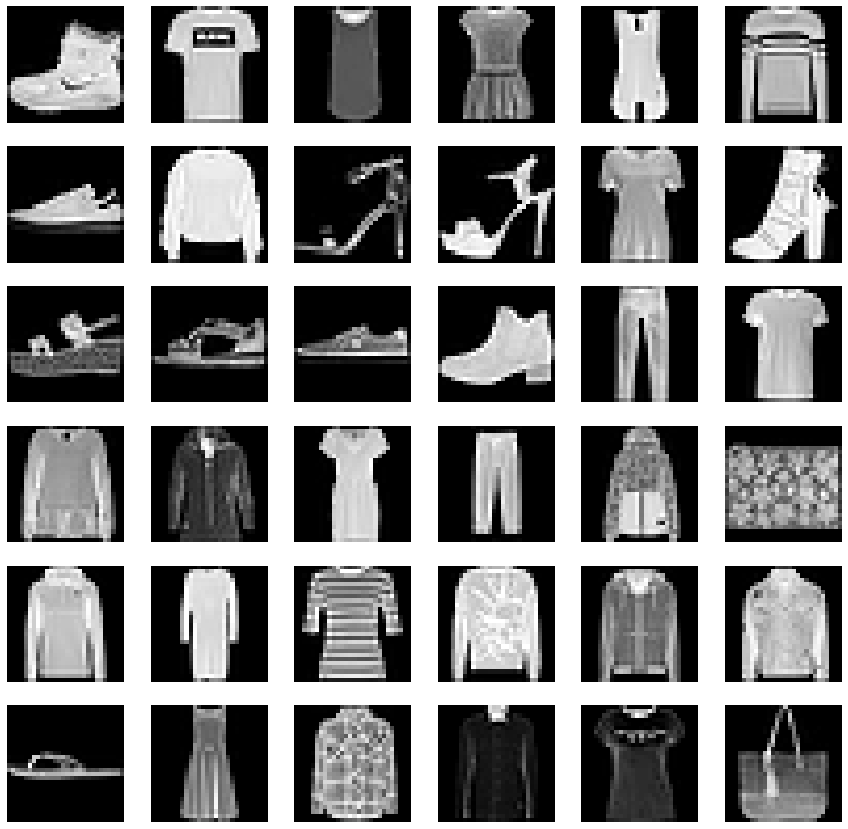

In [ ]:
plt.figure(figsize=(15,15))

for i in range(36):
  plt.subplot(6,6,i+1)
  plt.axis("off")
  plt.imshow(X_train[i].reshape(28,28),"gray")
plt.show()

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(-1,28*28)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test = X_test.reshape(-1,28*28)

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 128,activation="relu", input_shape = (784, )))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Dense(units = 10,activation="softmax"))


model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["sparse_categorical_accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train, validation_split=0.3, epochs=30, batch_size=32)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6025 - sparse_categorical_accuracy: 0.7837 - val_loss: 0.4488 - val_sparse_categorical_accuracy: 0.8391
Epoch 2/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4398 - sparse_categorical_accuracy: 0.8409 - val_loss: 0.3875 - val_sparse_categorical_accuracy: 0.8623
Epoch 3/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4015 - sparse_categorical_accuracy: 0.8533 - val_loss: 0.3624 - val_sparse_categorical_accuracy: 0.8666
Epoch 4/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3754 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.3587 - val_sparse_categorical_accuracy: 0.8671
Epoch 5/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3548 - sparse_categorical_accuracy: 0.8693 - val_loss: 0.3543 - val_sparse_categorical_accuracy: 0.8720
Epoch 6/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3450 - spars

In [ ]:
loss = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Training-Validation Accuracy')

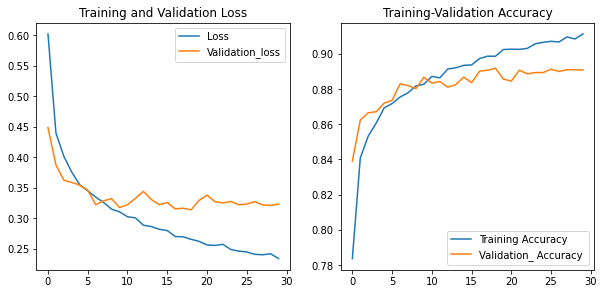

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['sparse_categorical_accuracy'],label = "Training Accuracy")
plt.plot(loss['val_sparse_categorical_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
test_loss,test_accuracy= model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3539 - sparse_categorical_accuracy: 0.8855


In [ ]:
test_accuracy

0.8855000138282776

In [ ]:
test_loss

0.3538563847541809